In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing, linear_model, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor  # Added
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
from scipy import stats



# NOTE: Conclusion is mentioned in last

# Without Cross Validation

# Insights after Performing Data Science Life Cycle on Life Expectancy Dataset Dataset Without  cv

- HISTORGRAM PLOT


- In Historgram plot we can see that, This distribution suggests that the majority of your data is concentrated in one range or or multiple range: Normalized Loss: Sharp peak on the left side, indicating high frequency of low values. X-axis ranges from 0 to 100,000. Y-axis ranges from 0 to 600.
- Life Expectancy Histogram: Data distributed between 0 and about 100 on the x-axis. Y-axis ranges from 0 to about 100.
- Adult molarity Histogram: Cyan-colored bars with a sharp peak on the left side (similar to alcohal but smaller scale). X-axis ranges from 0 to about 25. Y-axis ranges up to approximately 500.
- Infant death Histogram: Cyan-colored bars showing another sharp initial some peak that declines rapidly. X-axis ranging from around 0 to 1700. Y-axis peaking at just over 1600.



- BOX PLOT


- In boxplot we can see that there are few outlier in our dataset in columns percent of expenditure and instant death and  others
- For removing oultier i use IQR method and after remove we can see new boxplot does contain few amount of oultiers.


- Model Accuracy without cross valiation
  
  I implemented three Regression model linear, KNN and random forest and overall we can see that random forest is very good

  Linear Regression Results:
  R-squared: 0.7489039180158683
  Mean Squared Error: 0.2862529432844452

  KNN Regression Results:
  R-squared: 0.8392975221199117
  Mean Squared Error: 0.18320300708310472

  Random Forest Regression Results:
  R-squared: 0.905235897625214
  Mean Squared Error: 0.10803236358026995
  overall overmodel accuracy are very good  R-square represent that over mdel accuracy is very good and mean square error.
   showing  over model are very good for prediction
  
  
- Regression Plot


  In our regression plot we can see that our model prediction are very good for all three models
       
       
       
- OLS Regression Model 


  The model predicts life expectancy (dependent variable) based on country, year, and 18 other factors.
  The model explains 77.5% of the variation in life expectancy.
  There is a statistically significant relationship between the variables (very low p-value).
  However, some factors like country and adult mortality have high p-values, so their influence on life expectancy is less clear.
  Year, infant deaths, hepatitis B, and several other factors significantly influence life expectancy (very low p-values)





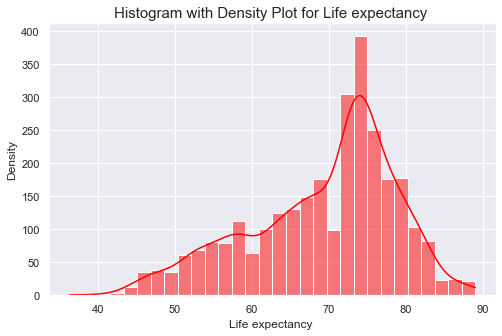

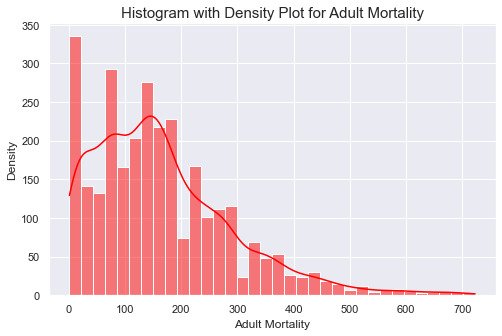

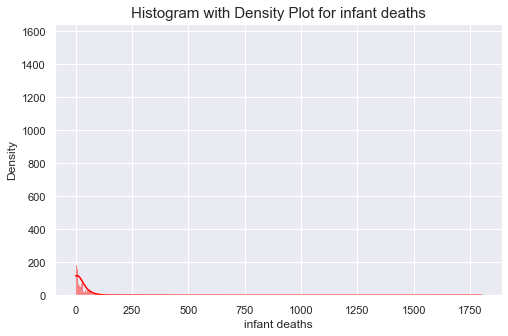

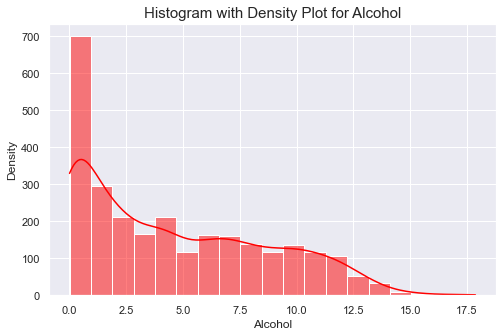

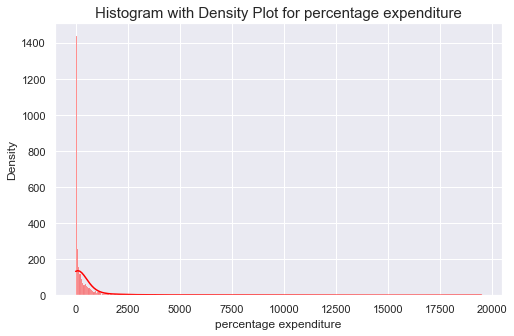

################################################


perfrom eda using boxplot for each column 


################################################




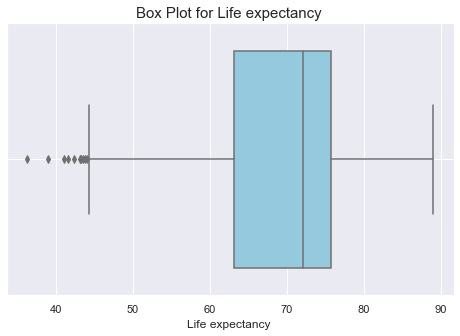

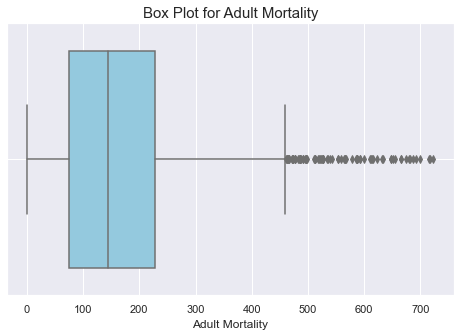

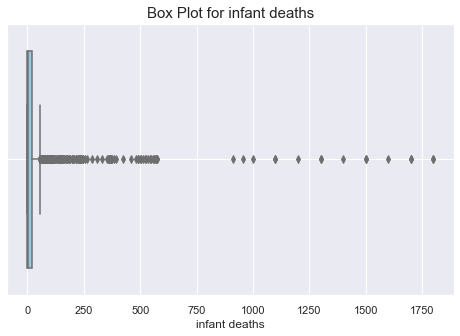

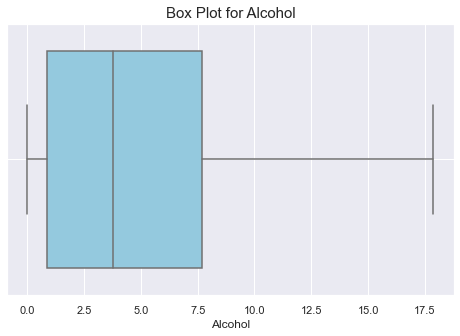

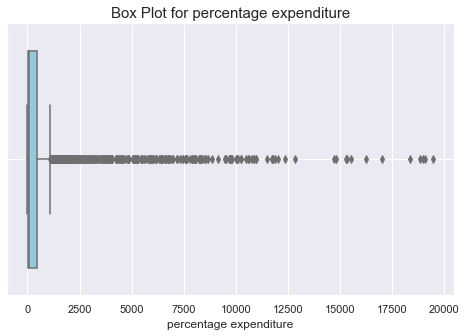

Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Linear Regression Results:
R-squared: 0.8315681763211151
Mean Squared Error: 0.16694121114242022
Mean Absolute Er

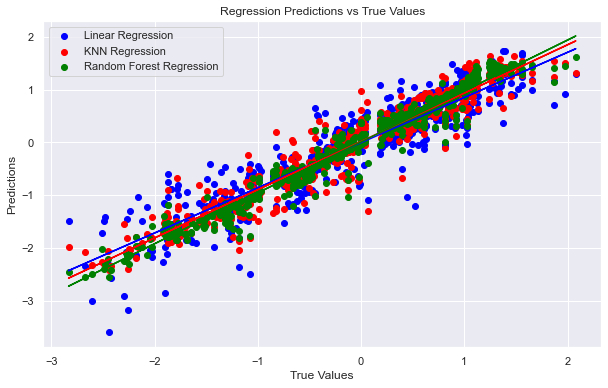

In [92]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def regression_analysis(target_column, file_path):
    # Step 1: Load dataset
    df = pd.read_csv(file_path)
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns[1:6]:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], kde=True, color='red')
        plt.title(f'Histogram with Density Plot for {column}', fontsize=15)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.grid(True)
        plt.show()
    print('################################################\n\n')
    print('perfrom eda using boxplot for each column \n\n') 
    print('################################################\n\n')

    for column in numeric_columns[1:6]:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[column], color='skyblue')
        plt.title(f'Box Plot for {column}', fontsize=15)
        plt.xlabel(column, fontsize=12)
        plt.grid(True)
        plt.show()
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)
    df.fillna(df.mean(), inplace=True)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
#     df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    categorical_cols = list(df.select_dtypes(include=['object']).columns)
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

    X = df_scaled.drop(columns=[target_column])
    y = df_scaled[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
    lr_model = LinearRegression()
    knn_model = KNeighborsRegressor()
    rf_model = RandomForestRegressor(n_estimators=100, random_state=21)  # Added
    
    lr_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train) 
    lr_predictions = lr_model.predict(X_test)
    knn_predictions = knn_model.predict(X_test)
    rf_predictions = rf_model.predict(X_test)  
    
    print("Linear Regression Results:")
    print("R-squared:", r2_score(y_test, lr_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
    print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))

    
    print("\nKNN Regression Results:")
    print("R-squared:", r2_score(y_test, knn_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
    print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))


    
    print("\nRandom Forest Regression Results:")  
    print("R-squared:", r2_score(y_test, rf_predictions))  
    print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions)) 
    print("Mean Absolute Error:", mean_absolute_error(y_test, rf_predictions))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, rf_predictions)))

    

    plt.figure(figsize=(10,6))
    
    plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
    lr_line = np.polyfit(y_test, lr_predictions, 1)
    plt.plot(y_test, lr_line[0] * y_test + lr_line[1], color='blue')
    
    plt.scatter(y_test, knn_predictions, color='red', label='KNN Regression')
    knn_line = np.polyfit(y_test, knn_predictions, 1)
    plt.plot(y_test, knn_line[0] * y_test + knn_line[1], color='red')
    
    plt.scatter(y_test, rf_predictions, color='green', label='Random Forest Regression')
    rf_line = np.polyfit(y_test, rf_predictions, 1)
    plt.plot(y_test, rf_line[0] * y_test + rf_line[1], color='green')
    
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Regression Predictions vs True Values')
    plt.legend()
    
    X_train_ols = sm.add_constant(X_train)
    X_test_ols = sm.add_constant(X_test)
    ols_model = sm.OLS(y_train, X_train_ols).fit()
    ols_summary = ols_model.summary()
    y_predols = ols_model.predict(X_test_ols)
    print(ols_model.summary())
    
    residuals = y_test - y_predols
    r2_ols = r2_score(y_test, y_predols)
# Calculate MAE
    mae = np.mean(np.abs(residuals))

# Calculate MSE
    mse = np.mean(residuals**2)

# Calculate RMSE
    rmse = np.sqrt(mse)
    print("R-squared (R2) Score:", r2_ols)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    
    
   




regression_analysis('Life expectancy ', r'C:\Users\Hamza\Desktop\Regression.Life.Expectancy.csv')


# With Cross Validation

# Insights after Performing Data Science Life Cycle on Life Expectancy Dataset Dataset with cross validataion


- Model Accuracy with cross valiation
  
  I implemented three Regression model linear, KNN and random forest and overall we can see that random forest is very good

   Linear Regression Cross-Validation R-squared: 0.6459528928385387
   KNN Regression Cross-Validation R-squared: 0.6159441219329578
   Random Forest Regression Cross-Validation R-squared: 0.7591699247994296

   Linear Regression Results:
   R-squared: 0.7489039180158683
   Mean Squared Error: 0.2862529432844452

   KNN Regression Results:
   R-squared: 0.8392975221199117
   Mean Squared Error: 0.18320300708310472

   Random Forest Regression Results:
   R-squared: 0.905235897625214
   Mean Squared Error: 0.10803236358026995
  overall overmodel accuracy are very good  R-square represent that over mdel accuracy is very good and mean square error.
   showing  over model are very good for prediction and not a big impact of cross validation
  
  
- Regression Plot


  In our regression plot we can see that our model prediction are very good for all three models
       
       
       
- OLS Regression Model 


   The model predicts life expectancy (dependent variable) for people in different countries.
   Factors like adult mortality, under-five deaths, and BMI seem to significantly affect life expectancy (low p-values).
   However, the influence of factors like infant deaths and expenditure on health is less clear (higher p-values).
   Overall, the model explains 77.5% of the variation in life expectancy.
   There is a statistically significant relationship between the variables (very low p-value).░


Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Linear Regression Cross-Validation R-squared: 0.7883944665075091
KNN Regression Cross-Validation R-squared: 0.762

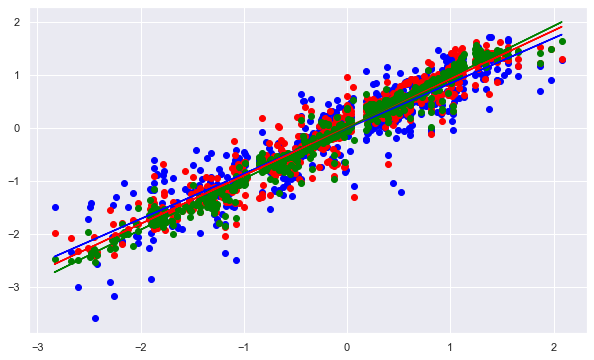

################ols################
                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     495.8
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:36:57   Log-Likelihood:                -1339.2
No. Observations:                2350   AIC:                             2722.
Df Residuals:                    2328   BIC:                             2849.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm

def regression_analysis(target_column, file_path):
    # Step 1: Load dataset
    df = pd.read_csv(file_path)
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)
    df.fillna(df.mean(), inplace=True)

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
#     df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    categorical_cols = list(df.select_dtypes(include=['object']).columns)
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

    X = df_scaled.drop(columns=[target_column])
    y = df_scaled[target_column]
    lr_model = LinearRegression()
    knn_model = KNeighborsRegressor()
    rf_model = RandomForestRegressor(n_estimators=100, random_state=19)

    lr_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
    knn_scores = cross_val_score(knn_model, X, y, cv=5, scoring='r2')
    rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
    
    print("Linear Regression Cross-Validation R-squared:", lr_scores.mean())
    print("KNN Regression Cross-Validation R-squared:", knn_scores.mean())
    print("Random Forest Regression Cross-Validation R-squared:", rf_scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
    
    lr_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)
    
    lr_predictions = lr_model.predict(X_test)
    knn_predictions = knn_model.predict(X_test)
    rf_predictions = rf_model.predict(X_test)
    
    print("\nLinear Regression Results:")
    print("R-squared:", r2_score(y_test, lr_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
    
    print("\nKNN Regression Results:")
    print("R-squared:", r2_score(y_test, knn_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
    
    print("\nRandom Forest Regression Results:")
    print("R-squared:", r2_score(y_test, rf_predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
    

    plt.figure(figsize=(10,6))
    
    plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
    lr_line = np.polyfit(y_test, lr_predictions, 1)
    plt.plot(y_test, lr_line[0] * y_test + lr_line[1], color='blue')
    
    plt.scatter(y_test, knn_predictions, color='red', label='KNN Regression')
    knn_line = np.polyfit(y_test, knn_predictions, 1)
    plt.plot(y_test, knn_line[0] * y_test + knn_line[1], color='red')
    
    plt.scatter(y_test, rf_predictions, color='green', label='Random Forest Regression')
    rf_line = np.polyfit(y_test, rf_predictions, 1)
    plt.plot(y_test, rf_line[0] * y_test + rf_line[1], color='green')
    plt.show()
    print('################ols################')
    X_train_ols = sm.add_constant(X_train)
    X_test_ols = sm.add_constant(X_test)
    ols_model = sm.OLS(y_train, X_train_ols).fit()
    ols_summary = ols_model.summary()
    y_predols = ols_model.predict(X_test_ols)
    print(ols_model.summary())
    
    residuals = y_test - y_predols
    r2_ols = r2_score(y_test, y_predols)
# Calculate MAE
    mae = np.mean(np.abs(residuals))

# Calculate MSE
    mse = np.mean(residuals**2)

# Calculate RMSE
    rmse = np.sqrt(mse)
    print("R-squared (R2) Score:", r2_ols)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
   
regression_analysis('Life expectancy ', r'C:\Users\Hamza\Desktop\Regression.Life.Expectancy.csv')


# Conclusion

# We are implemented regression model with different ML model by using without and with cross validataion but one thing that we 
can see the there are not a big accuracy different in both strategy , becuase cross validatoin is commonly use with hyper paramenter 
tuning , in our case we are not implement with hyper paramenter,that why may be we are not get a large accuracy difference
but in our all case we can see that random forest regression provide use very good accuracy 
R-squared: 0.905235897625214
Mean Squared Error: 0.10803236358026995
and if we see knn regressor this is also good model for us
R-squared: 0.8392975221199117
Mean Squared Error: 0.18320300708310472
and if we see linear regression accuracy 
R-squared: 0.7489039180158683
Mean Squared Error: 0.2862529432844452
but at end we can see random forest and knn have good accuracy